In [1]:
import pickle

knnc = pickle.load(open("/tmp/shared/knnc_ds5.sav", "rb"))
svm = pickle.load(open("/tmp/shared/svm_ds5.sav", "rb"))
nb = pickle.load(open("/tmp/shared/nb_ds5.sav","rb"))

In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

In [3]:
categories_map = {'water': 1, 'forest': 2, 'field': 3, 'city': 4}

In [9]:
from PIL import Image

def drawImage(img, shape, title):

    fig, axs = mplt.subplots(1,figsize=(10,8))
    fig.suptitle(title)
    img_2d = img.reshape(shape)
    # ep.plot_bands(img_2d, vmin=1,
    #               cmap=ListedColormap(['blue', 'orange', 'yellow', 'purple']), title=title)
    labels = list(categories_map.keys())
    values = list(categories_map.values())

    im = axs.imshow(img_2d,cmap=ListedColormap(['blue','cyan', 'yellow', 'purple']))
        # Create a colorbar with the legend
    colorbar = fig.colorbar(im, ticks=values, shrink=0.5)
    colorbar.ax.set_yticklabels(labels)
    plt.show()

In [5]:
import matplotlib.pyplot as mplt

def createHyst(probabilities, title):

    fig, axs = mplt.subplots(probabilities.shape[1])
    fig.suptitle(title)

    for category in range(probabilities.shape[1]):
        col = (np.random.random(), np.random.random(), np.random.random())
        axs[category].hist(probabilities[:, category], color=col, range=(1/probabilities.shape[1], 1.01),label=list(categories_map.keys())[category])
        #label=list(categories_map.keys())[category]
        axs[category].legend()

In [6]:
def createProbalitiesCharts(probabilities):

    fig1, axs1 = mplt.subplots(probabilities.shape[1], figsize=(20,6))

    for category in range(probabilities.shape[1]):
        col = (np.random.random(), np.random.random(), np.random.random())
        axs1[category].plot(list(range(probabilities.shape[0])), probabilities[:, category], color=col, label=list(categories_map.keys())[category])
        axs1[category].legend()

In [7]:
from IPython.display import display, Markdown, Latex
import itertools
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def predict_images(path):
    display(Markdown(f"# Using path {path}"))
    test_image_bands = glob(path)
    test_image_bands.sort()
    print("Files to predict: ")
    print(test_image_bands)
    l2 = []
    for i in test_image_bands:
      with rio.open(i, 'r') as f:
        l2.append(f.read(1))
    arr_st2 = np.stack(l2)
    display(Markdown(f"Image shape is: **{arr_st2[0].shape}**"))
    imgs = []
    for img in l2:
        imgs.append(list(itertools.chain(*img)))
    display(Markdown(f"## Image RGB bands: "))
    ep.plot_rgb(
    arr_st2,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
    )

    plt.show()

    tst_img_np = np.asarray(imgs)
    tst_img_np.shape
    tst_img_np = np.moveaxis(tst_img_np, -1, 0)
    # scaler2 = StandardScaler().fit(tst_img_np)
    #
    # X_scaled2 = scaler2.transform(tst_img_np)


    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled2 = scaler.fit_transform(tst_img_np)


    display(Markdown(f"### Prediction result: "))
    knnc_image_predict = knnc.predict(X_scaled2)
    drawImage(knnc_image_predict, arr_st2[0].shape, "KNNC")
    knnc_image_predict_proba = knnc.predict_proba(X_scaled2)
    createHyst(knnc_image_predict_proba, "KNNC")

    svm_image_predict = svm.predict(X_scaled2)
    drawImage(svm_image_predict, arr_st2[0].shape, "SVM")
    svm_image_predict_proba = svm.predict_proba(X_scaled2)
    createHyst(svm_image_predict_proba, "SVM")

    nb_image_predict = nb.predict(X_scaled2)
    drawImage(nb_image_predict, arr_st2[0].shape, "NB")
    nb_image_predict_proba = nb.predict_proba(X_scaled2)
    createHyst(nb_image_predict_proba, "NB")


# Using path /tmp/shared/dataset4/2/*B?*.tiff

Files to predict: 
['/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B06_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B11_(Raw).tiff', '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B12_(Ra

Image shape is: **(638, 1094)**

## Image RGB bands: 

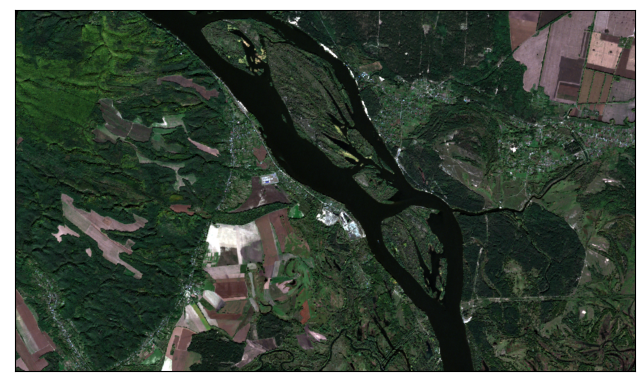

### Prediction result: 

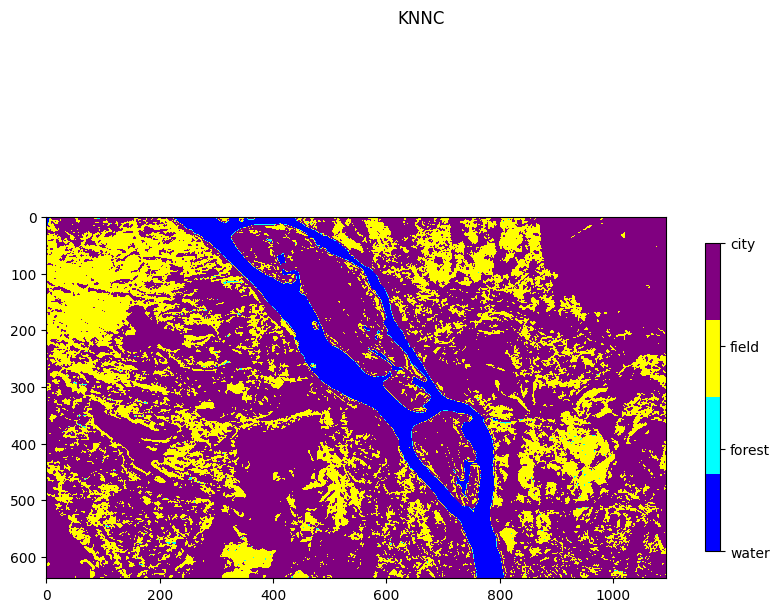

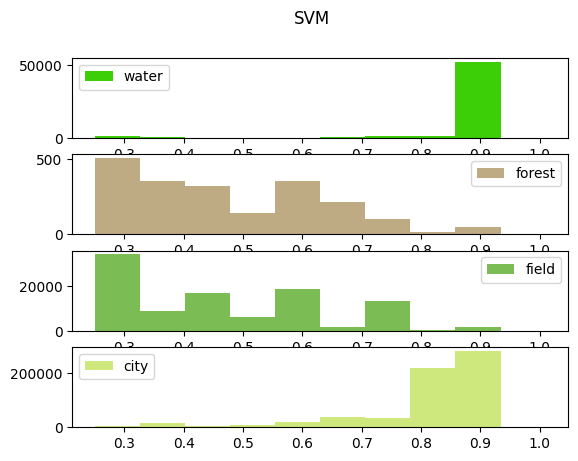

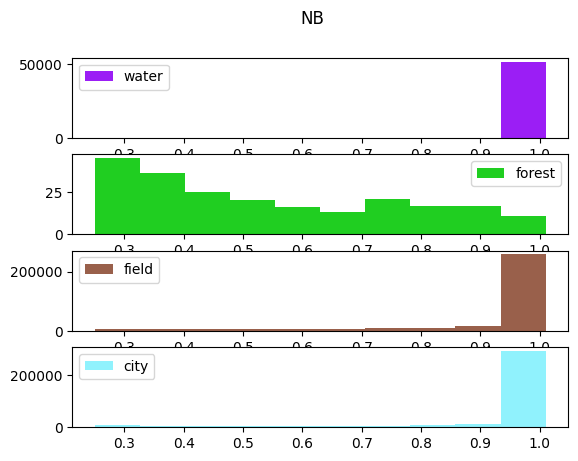

In [10]:
predict_images("/tmp/shared/dataset4/2/*B?*.tiff")

# Using path /tmp/shared/dataset4/27/*B?*.tiff

Files to predict: 
['/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B01_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B02_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B03_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B04_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B05_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B06_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B07_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B08_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B09_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_L2A_B11_(Raw).tiff', '/tmp/shared/dataset4/27/2022-11-08-00_00_2022-11-08-23_59_Sentinel-2_

Image shape is: **(694, 1051)**

## Image RGB bands: 

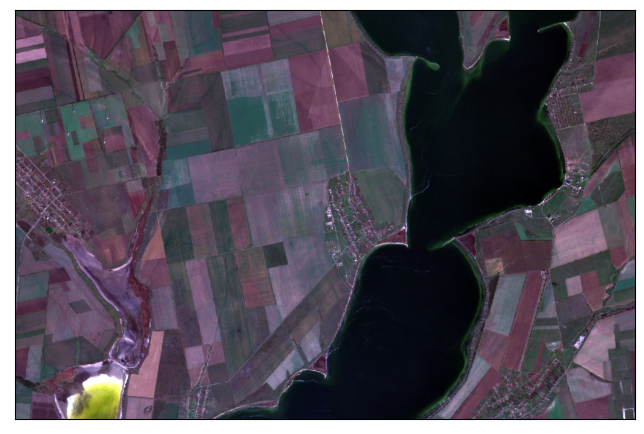

### Prediction result: 

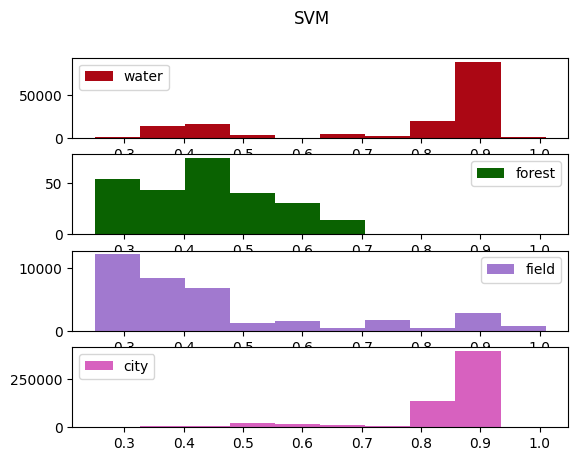

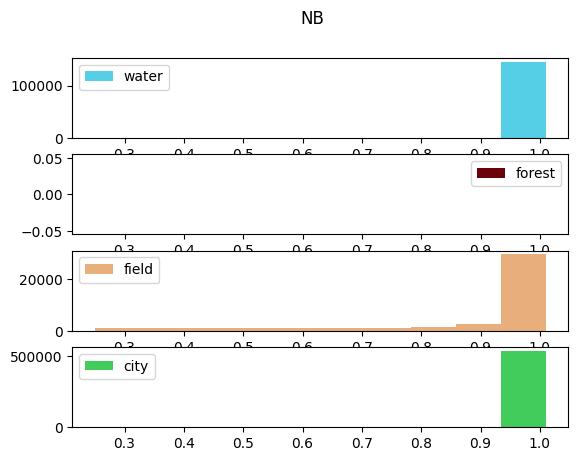

In [11]:
predict_images("/tmp/shared/dataset4/27/*B?*.tiff")

# Using path /tmp/shared/dataset4/22/*B?*.tiff

Files to predict: 
['/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B01_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B02_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B03_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B04_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B05_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B06_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B07_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B08_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B09_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_B11_(Raw).tiff', '/tmp/shared/dataset4/22/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_

Image shape is: **(694, 1051)**

## Image RGB bands: 

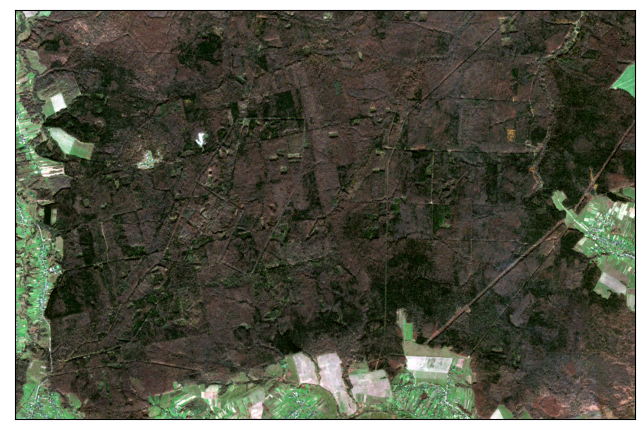

### Prediction result: 

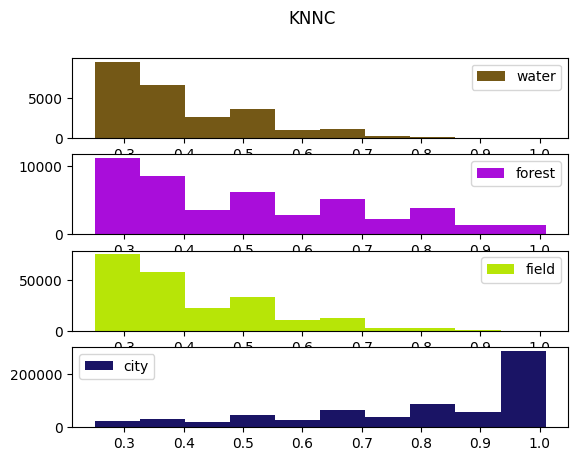

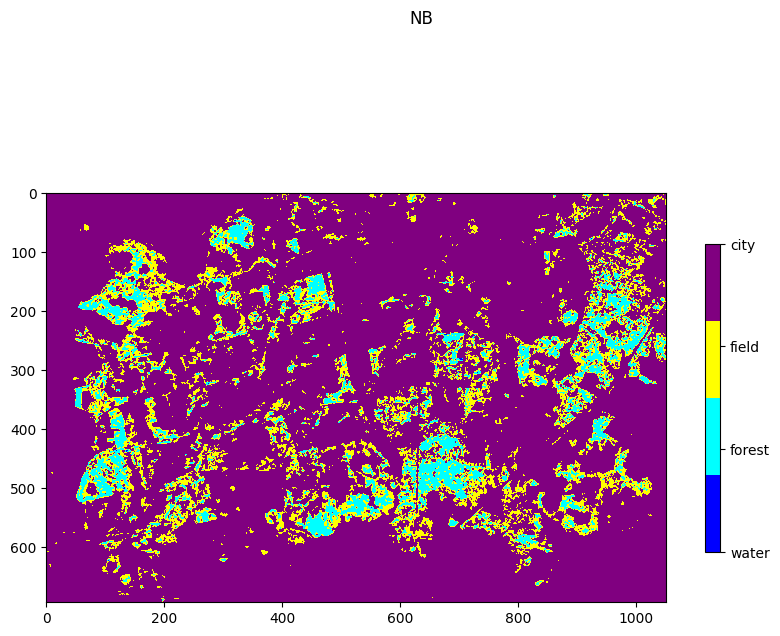

In [12]:
predict_images("/tmp/shared/dataset4/22/*B?*.tiff")

# Using path /tmp/shared/dataset4/12/*B?*.tiff

Files to predict: 
['/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_B11_(Raw).tiff', '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_

Image shape is: **(760, 1250)**

## Image RGB bands: 

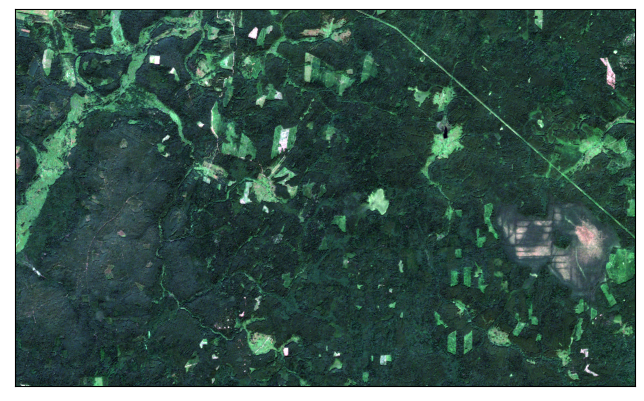

### Prediction result: 

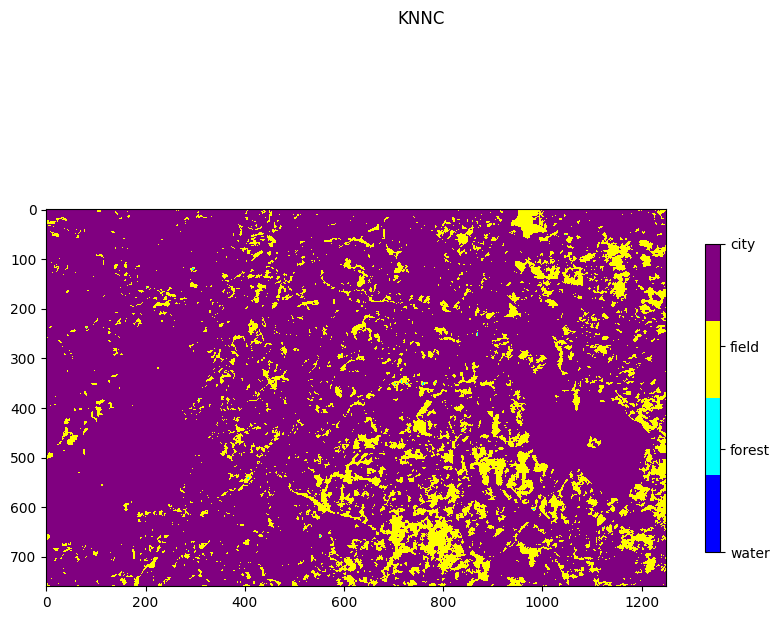

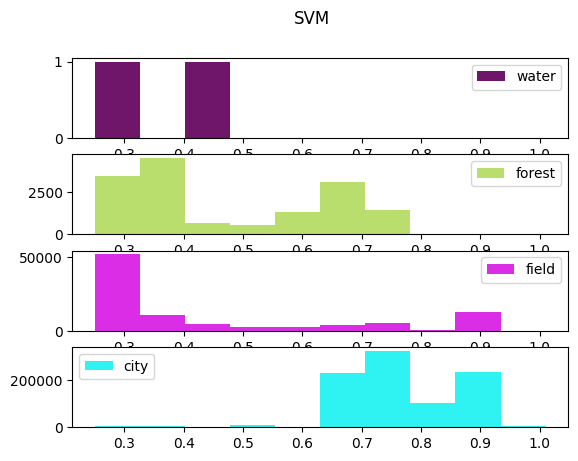

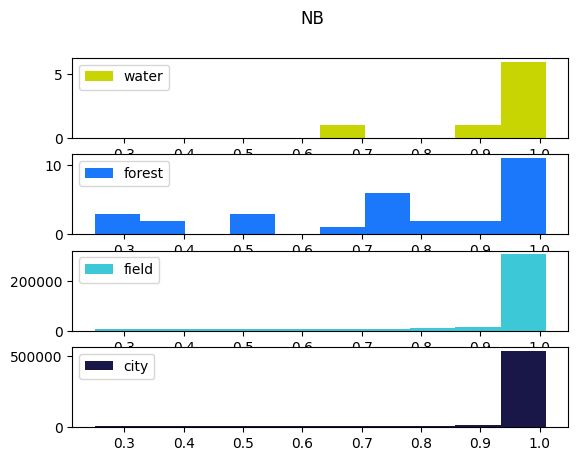

In [13]:
predict_images("/tmp/shared/dataset4/12/*B?*.tiff")

# Using path /tmp/shared/dataset4/5/*B?*.tiff

Files to predict: 
['/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B06_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B11_(Raw).tiff', '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B12_(Ra

Image shape is: **(638, 1094)**

## Image RGB bands: 

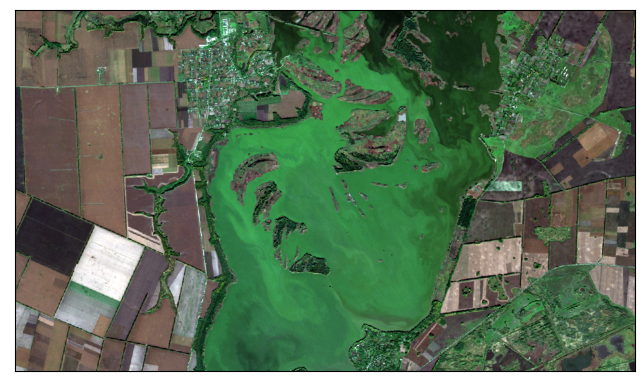

### Prediction result: 

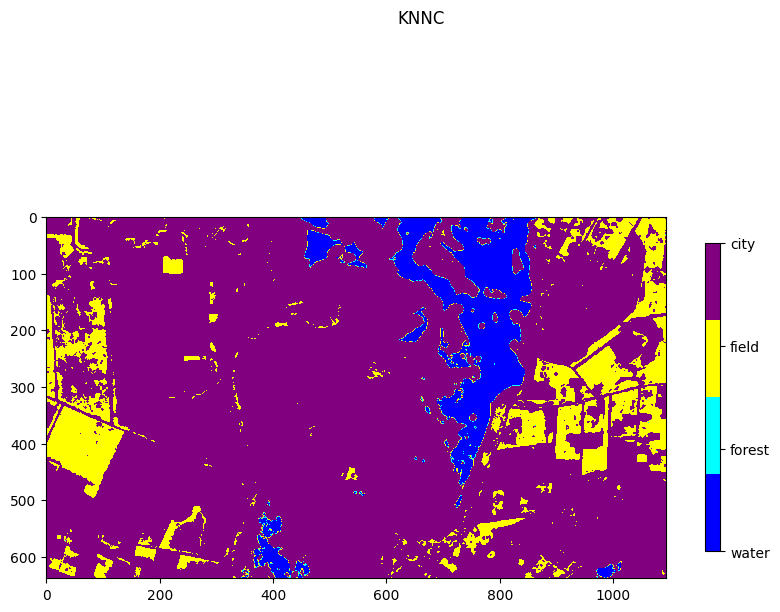

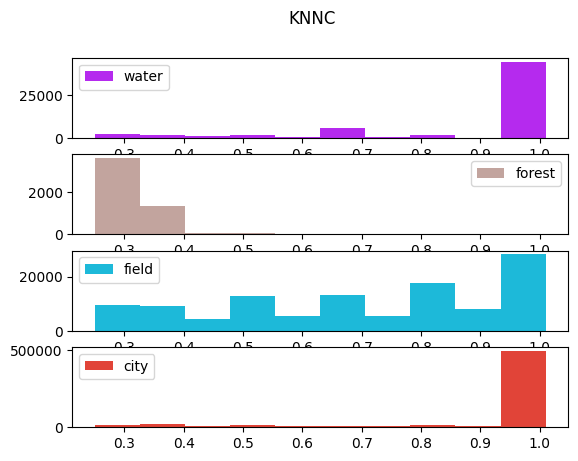

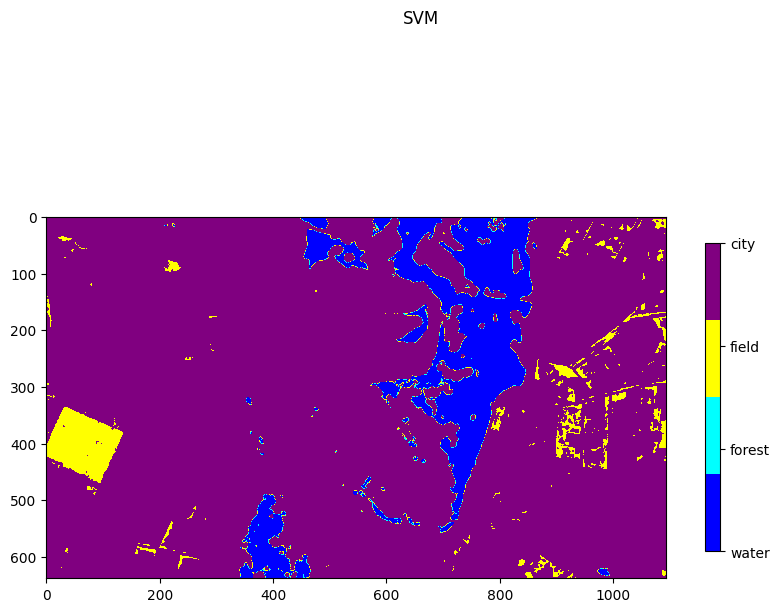

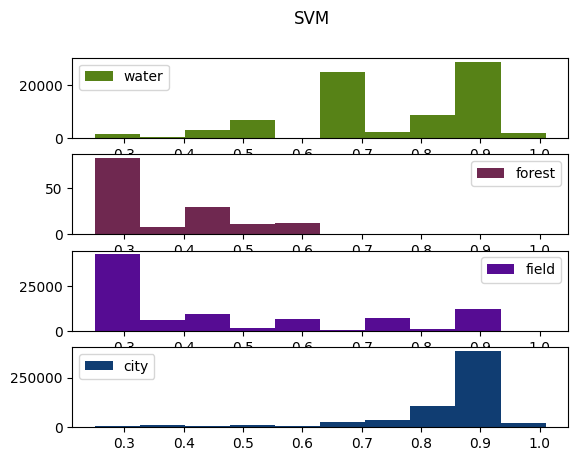

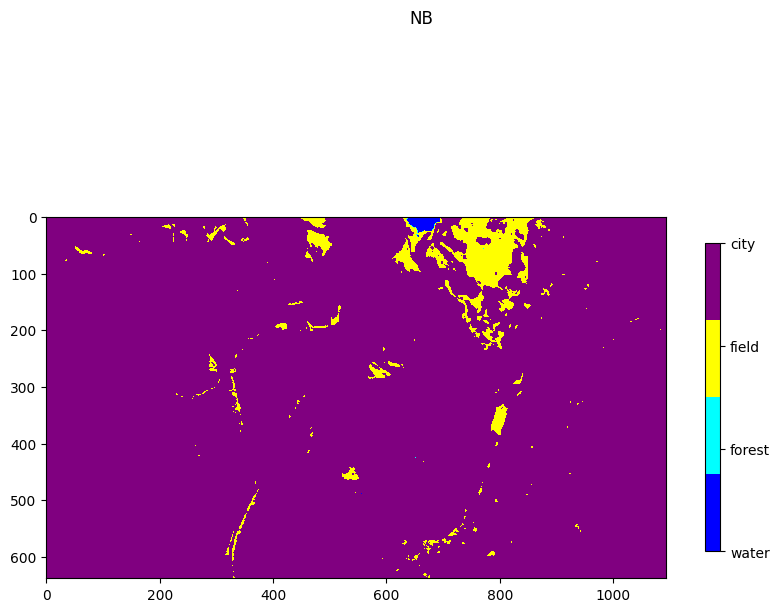

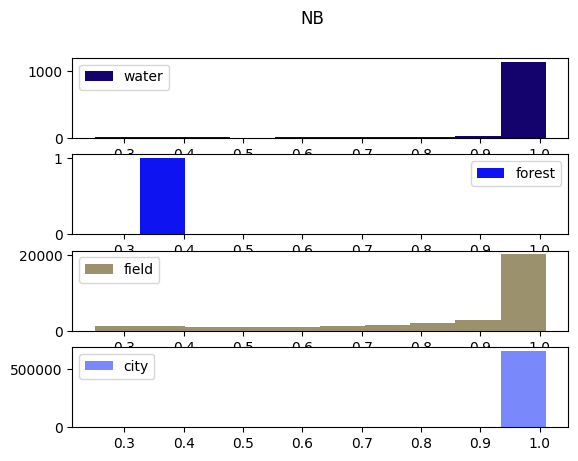

In [14]:
predict_images("/tmp/shared/dataset4/5/*B?*.tiff")